In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet

In [2]:
FILE = 'diffs.parq.gzip'

sns.set_style("darkgrid")
pd.options.display.max_columns = 100

In [3]:
data = pd.read_parquet(FILE)
data.head()

,sales,discount,age,gender,cust_state,tenure,profit,month
0,1153.28,0,25,O,MA,19,57.66,7
1,1978.13,0,26,M,MG,16,98.91,6
2,1095.70,0,26,W,RJ,20,54.78,2
3,2404.90,25,30,W,BA,18,95.24,6
4,1704.80,0,38,M,PB,15,85.24,4


In [5]:
by_state = data.groupby(['month', 'cust_state'])[['profit', 'discount']].mean().reset_index()
by_state.head()

,month,cust_state,profit,discount
0,0,AC,42.190000,0.0
1,0,AL,55.047647,0.0
2,0,AM,62.797273,0.0
3,0,AP,63.494000,0.0
4,0,BA,67.307551,0.0


In [6]:
max_idx = by_state.loc[:, 'discount'].idxmax()
max_state = by_state.loc[max_idx, :]
max_state

month                 17
cust_state            MG
profit        110.530735
discount       41.176471
Name: 468, dtype: object

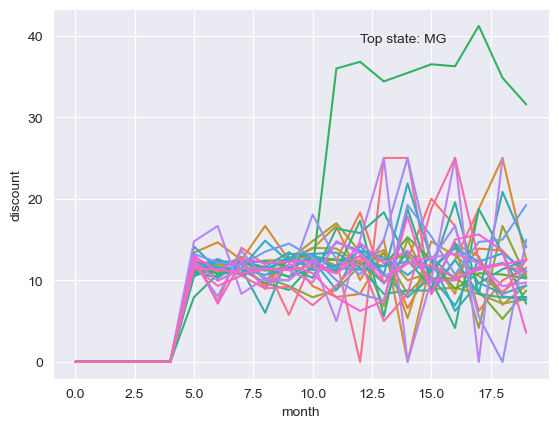

In [7]:
g = sns.lineplot(x='month', y='discount', hue='cust_state', data=by_state, legend=False)
plt.annotate(
    text=f"Top state: {max_state['cust_state']}", xy=(max_state['month'], max_state['discount']),
    xytext=(max_state['month']-5, max_state['discount']-2),
)
plt.show()

In [11]:
pivoted = by_state.pivot(index='month', columns='cust_state', values='profit').fillna(0)
pivoted

cust_state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
month,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,42.190000,55.047647,62.797273,63.494000,67.307551,79.947778,15.791429,80.367273,117.773462,82.661935,82.880526,36.418750,76.405333,34.778684,60.008696,100.613800,32.390909,74.887059,69.956111,63.357000,43.776667,57.260000,34.999444,27.495625,16.405000,103.014244,37.040000
1,42.866000,51.954800,72.500000,54.530000,71.463093,85.956667,19.945625,80.817200,121.725758,82.319318,81.962991,32.764286,72.812308,35.547400,62.559000,101.328929,33.114737,79.460299,67.488941,63.868947,48.931429,67.148000,36.594308,31.455455,19.660000,103.956466,41.450000
2,43.717143,46.515135,67.556275,68.231667,72.513684,89.837619,28.060938,86.637955,121.561389,83.237867,86.363167,39.760000,68.696667,32.905000,66.379545,101.343208,46.268889,84.896723,65.903920,65.550698,47.741579,74.894286,43.493920,38.083846,27.690455,106.974268,48.804375
3,42.665455,44.704032,71.761605,73.148889,75.950916,90.885620,35.793043,90.811477,123.448310,81.540486,91.137815,41.849245,67.422462,34.786559,67.110933,104.769175,37.801667,84.782019,65.616638,72.470250,52.260937,68.352500,47.541168,38.429041,25.347059,106.514163,46.877778
4,38.514000,38.983294,75.687207,75.322500,77.949444,95.577831,43.432821,96.985339,123.895369,79.171152,94.415371,42.238539,66.443659,35.115826,74.273429,105.363608,39.953218,89.253986,65.287454,76.204337,57.030682,62.072500,54.860063,43.115078,27.216154,107.545872,45.217353
5,41.649310,31.797368,78.271926,69.351786,78.952319,94.778441,47.277660,99.057559,120.839486,76.483467,94.492962,44.466824,62.651000,30.045601,73.830290,101.781028,38.343451,87.948212,64.472000,77.841933,58.454667,61.603636,59.706278,44.414685,25.810875,107.225881,37.867500
6,36.657037,30.944731,78.913917,67.600000,80.666347,99.432095,62.873523,100.371389,121.417048,74.451179,97.832780,45.173978,54.993750,31.445926,77.230556,103.934967,43.250385,94.249459,65.543528,83.237983,62.283774,64.559333,63.646376,46.875233,28.390714,108.470502,42.945490
7,36.162400,26.473636,83.099060,76.647000,81.501328,104.863297,64.232796,99.888250,122.207006,73.252598,99.716309,45.359647,53.262841,33.135285,80.324240,107.390648,41.619706,100.197857,68.812020,90.171667,57.726970,68.001905,70.021509,48.431675,27.899589,111.223821,40.630385
8,37.150000,30.585846,88.439079,76.303810,83.881258,107.663279,74.505429,103.699500,118.027143,78.157818,102.156211,47.786842,54.317260,38.022291,83.962278,107.295350,41.547971,98.802412,71.648874,94.235135,63.720400,64.678824,76.161011,50.369689,31.233208,111.441579,39.010800


In [19]:
states = [c for c in pivoted.columns if 'MG' not in c]
X = pivoted.loc[pivoted.index < 11, states]
y = pivoted.loc[pivoted.index < 11, 'MG']

In [21]:
mod = ElasticNet(alpha=50, fit_intercept=False, max_iter=10000)
mod.fit(X, y)

ElasticNet(alpha=50, fit_intercept=False, max_iter=10000)

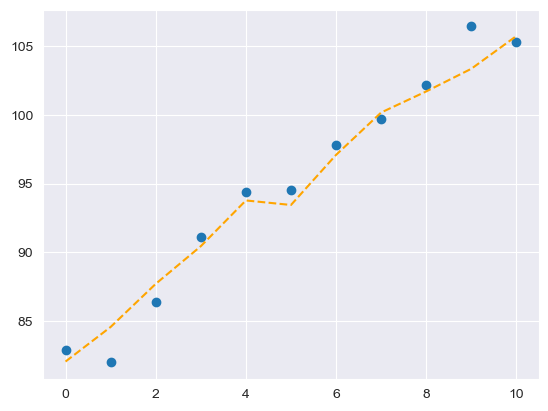

In [47]:
plt.scatter(y.index, y)
plt.plot(mod.predict(X), color='orange', linestyle='--')
plt.show()

In [41]:
mod.coef_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.15666702, 0.06709938, 0.15451208, 0.14239844, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.11871068,
       0.        , 0.08386732, 0.        , 0.11140646, 0.        ,
       0.        , 0.00979641, 0.        , 0.        , 0.13232692,
       0.        ])

In [26]:
control = pivoted.loc[:, states] @ mod.coef_
control

month
0      82.030562
1      84.548799
2      87.689239
3      90.432526
4      93.767702
5      93.438249
6      97.087657
7     100.175943
8     101.710885
9     103.361913
10    105.748861
11    109.687868
12    109.170206
13    114.179174
14    115.046365
15    117.595582
16    118.110833
17    121.992623
18    126.398961
19    128.030301
dtype: float64

In [38]:
results = pd.DataFrame({
    'month': control.index,
    'MG': pivoted.loc[:, 'MG'],
    'control': control,
    'difference': control - pivoted.loc[:, 'MG']
}).melt(id_vars='month')

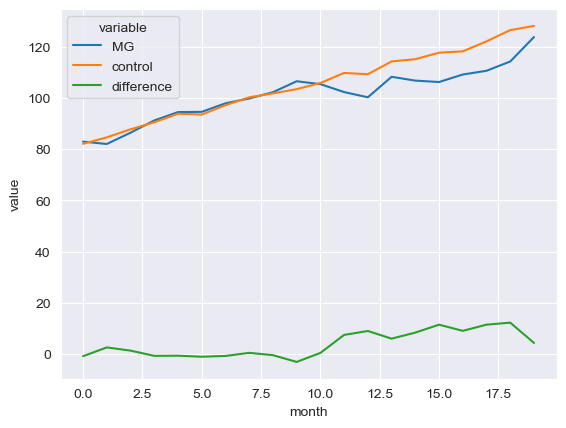

In [39]:
g = sns.lineplot(x='month', y='value', hue='variable', data=results)
plt.show()